# EDA on NYC Taxi Tip Data

In [0]:
# Load data
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("NYC Taxi Tip EDA").getOrCreate()
df = spark.read.csv("/FileStore/tables/NYC_Taxi_Trip_Record_Clean.csv", header=True, inferSchema=True)
df.cache()

Out[1]: DataFrame[lpep_pickup_datetime: string, lpep_dropoff_datetime: string, day_category: string, pickup_time: string, RatecodeID: string, PULocationID: int, PUBorough: string, PUZone: string, DOLocationID: int, DOBorough: string, DOZone: string, passenger_count: string, trip_distance: double, distance_bins: string, fare_amount: double, fare_amount_bins: string, tip_amount: double, tip_amount_bins: string, payment_type: string, trip_type: string, trip_duration: double, duration_bins: string, speed: double, speed_bins: string]

In [0]:
# 2. 
df.printSchema()

root
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- lpep_dropoff_datetime: string (nullable = true)
 |-- day_category: string (nullable = true)
 |-- pickup_time: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- PUBorough: string (nullable = true)
 |-- PUZone: string (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- DOBorough: string (nullable = true)
 |-- DOZone: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- distance_bins: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- fare_amount_bins: string (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tip_amount_bins: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- trip_type: string (nullable = true)
 |-- trip_duration: double (nullable = true)
 |-- duration_bins: string (nullable = true)
 |-- speed: double (n

In [0]:

df.show(5)

+--------------------+---------------------+------------+-----------+-------------+------------+---------+-------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+-------------+-----+----------+
|lpep_pickup_datetime|lpep_dropoff_datetime|day_category|pickup_time|   RatecodeID|PULocationID|PUBorough|             PUZone|DOLocationID|DOBorough|              DOZone|passenger_count|trip_distance|distance_bins|fare_amount|fare_amount_bins|tip_amount|tip_amount_bins|payment_type|  trip_type|trip_duration|duration_bins|speed|speed_bins|
+--------------------+---------------------+------------+-----------+-------------+------------+---------+-------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+---------

In [0]:

df.count()

Out[4]: 60698

In [0]:
# 5. Get summary statistics (count, mean, stddev, min, max) of numeric columns?

df.describe().show()

+-------+--------------------+---------------------+------------+-----------+-------------+------------------+-------------+--------------------+-----------------+-------------+--------------------+------------------+------------------+-------------+------------------+----------------+------------------+---------------+------------+-----------+------------------+-------------+-----------------+----------+
|summary|lpep_pickup_datetime|lpep_dropoff_datetime|day_category|pickup_time|   RatecodeID|      PULocationID|    PUBorough|              PUZone|     DOLocationID|    DOBorough|              DOZone|   passenger_count|     trip_distance|distance_bins|       fare_amount|fare_amount_bins|        tip_amount|tip_amount_bins|payment_type|  trip_type|     trip_duration|duration_bins|            speed|speed_bins|
+-------+--------------------+---------------------+------------+-----------+-------------+------------------+-------------+--------------------+-----------------+-------------+-----

In [0]:
# 6. Calculate average tip amount grouped by passenger count
from pyspark.sql.functions import col, avg

# Ensure passenger_count is treated as integer (if not already)
df = df.withColumn("passenger_count", col("passenger_count").cast("int"))

# Group by passenger_count and calculate average tip_amount
avg_tip_by_passenger = df.groupBy("passenger_count").agg(avg("tip_amount").alias("average_tip_amount"))

# Order by passenger_count for better readability
avg_tip_by_passenger.orderBy("passenger_count").show()


+---------------+------------------+
|passenger_count|average_tip_amount|
+---------------+------------------+
|           null| 2.434799190010125|
|              1|2.2478845308828332|
|              2|2.2726701916721734|
|              3| 2.309636576787808|
+---------------+------------------+



In [0]:
# 7. Calculate total tip amount by payment type
from pyspark.sql.functions import sum, col

# Cast tip_amount to float and group by payment_type
df = df.withColumn("tip_amount", col("tip_amount").cast("float"))

# Now group and sum
total_tip_by_payment = df.groupBy("payment_type").agg(sum("tip_amount").alias("total_tip_amount"))

# Order by descending total_tip_amount
total_tip_by_payment.orderBy(col("total_tip_amount").desc()).show()


+------------+------------------+
|payment_type|  total_tip_amount|
+------------+------------------+
| Credit card|137161.10006271675|
|        Cash|               0.0|
|     Dispute|               0.0|
|   No charge|               0.0|
|     Unknown|               0.0|
+------------+------------------+



In [0]:
# 8. Display records where the tip amount is greater than 5
# TODO: Write the code to answer the above question
from pyspark.sql.functions import col

# Ensure tip_amount is a float
df = df.withColumn("tip_amount", col("tip_amount").cast("float"))

# Filter for tip amounts greater than 5
high_tips_df = df.filter(col("tip_amount") > 5)

# Show the results
high_tips_df.show()


+--------------------+---------------------+------------+-----------+---------------+------------+---------+--------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+-------------+-----+----------+
|lpep_pickup_datetime|lpep_dropoff_datetime|day_category|pickup_time|     RatecodeID|PULocationID|PUBorough|              PUZone|DOLocationID|DOBorough|              DOZone|passenger_count|trip_distance|distance_bins|fare_amount|fare_amount_bins|tip_amount|tip_amount_bins|payment_type|  trip_type|trip_duration|duration_bins|speed|speed_bins|
+--------------------+---------------------+------------+-----------+---------------+------------+---------+--------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+

In [0]:
# 9. Identify outliers where tip amount is greater than 50?
# TODO: Write the code to answer the above question
from pyspark.sql.functions import col

# Filter for outliers where tip amount is greater than 50
outliers_df = df.filter(col("tip_amount") > 50)

# Show the outlier records
outliers_df.show()


+--------------------+---------------------+------------+-----------+----------+------------+---------+------+------------+---------+------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+---------+-------------+-------------+-----+----------+
|lpep_pickup_datetime|lpep_dropoff_datetime|day_category|pickup_time|RatecodeID|PULocationID|PUBorough|PUZone|DOLocationID|DOBorough|DOZone|passenger_count|trip_distance|distance_bins|fare_amount|fare_amount_bins|tip_amount|tip_amount_bins|payment_type|trip_type|trip_duration|duration_bins|speed|speed_bins|
+--------------------+---------------------+------------+-----------+----------+------------+---------+------+------------+---------+------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+---------+-------------+-------------+-----+----------+
+--------------------+---------------------+------------+-----------+----

In [0]:
# 10. How to calculate the correlation between trip distance and tip amount?
# TODO: Write the code to answer the above question
# Calculate the correlation between trip distance and tip amount
correlation = df.stat.corr("trip_distance", "tip_amount")

print(f"Correlation between trip distance and tip amount: {correlation}")


Correlation between trip distance and tip amount: 0.41653063645784316


In [0]:
# 11. Get average tip amount by day of the week
# TODO: Write the code to answer the above question
from pyspark.sql.functions import avg

# Average tip amount by day_category
df.groupBy("day_category") \
  .agg(avg("tip_amount").alias("avg_tip_amount")) \
  .orderBy("day_category") \
  .show()



+------------+-----------------+
|day_category|   avg_tip_amount|
+------------+-----------------+
|    Weekdays|2.244928690127156|
|     Weekend|2.304612369751061|
+------------+-----------------+



In [0]:
# 12. Get average tip amount by hour of the day
# TODO: Write the code to answer the above question
from pyspark.sql.functions import hour, avg

# Extract the hour from pickup datetime
df_with_hour = df.withColumn("hour_of_day", hour("lpep_pickup_datetime"))

# Group by the hour of the day and calculate the average tip amount
df_with_hour.groupBy("hour_of_day") \
  .agg(avg("tip_amount").alias("avg_tip_amount")) \
  .orderBy("hour_of_day") \
  .show()


+-----------+------------------+
|hour_of_day|    avg_tip_amount|
+-----------+------------------+
|       null|2.2597301404118215|
+-----------+------------------+



In [0]:
# 13. Calculate tip amount per mile and describe its statistics
# TODO: Write the code to answer the above question
from pyspark.sql.functions import col

# Calculate tip amount per mile
df_with_tip_per_mile = df.withColumn("tip_per_mile", col("tip_amount") / col("trip_distance"))

# Show the first few records to verify the new column
df_with_tip_per_mile.select("tip_amount", "trip_distance", "tip_per_mile").show(5)




+----------+-------------+------------------+
|tip_amount|trip_distance|      tip_per_mile|
+----------+-------------+------------------+
|      4.03|         2.58|1.5620155851970348|
|      2.64|         1.81|1.4585635938697097|
|       1.7|          1.3|1.3076923443720891|
|       0.0|          1.1|               0.0|
|       0.0|         2.78|               0.0|
+----------+-------------+------------------+
only showing top 5 rows



In [0]:
# 14. Get records with invalid fare or tip amounts. Then remove these invalid records from dataframe (make it clean)
# TODO: Write the code to answer the above question
# Filter out records where fare_amount or tip_amount is less than or equal to 0
df_invalid = df.filter((col("fare_amount") <= 0) | (col("tip_amount") <= 0))

# Show the invalid records
df_invalid.show(5)


+--------------------+---------------------+------------+-----------+-------------+------------+---------+--------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+-------------+-----+----------+
|lpep_pickup_datetime|lpep_dropoff_datetime|day_category|pickup_time|   RatecodeID|PULocationID|PUBorough|              PUZone|DOLocationID|DOBorough|              DOZone|passenger_count|trip_distance|distance_bins|fare_amount|fare_amount_bins|tip_amount|tip_amount_bins|payment_type|  trip_type|trip_duration|duration_bins|speed|speed_bins|
+--------------------+---------------------+------------+-----------+-------------+------------+---------+--------------------+------------+---------+--------------------+---------------+-------------+-------------+-----------+----------------+----------+---------------+------------+-----------+-------------+------

In [0]:
# 15. Calculate average tip by vendor ID
from pyspark.sql import functions as F

# Calculate the average tip amount by RatecodeID
df.groupBy("RatecodeID").agg(
    F.avg("tip_amount").alias("average_tip")
).show()




+---------------+------------------+
|     RatecodeID|       average_tip|
+---------------+------------------+
|Negotiated fare|2.8390565898105407|
| Newark Airport|12.787272713401101|
|  Standard rate| 2.225964040736406|
|    JFK Airport|12.380131550525364|
+---------------+------------------+



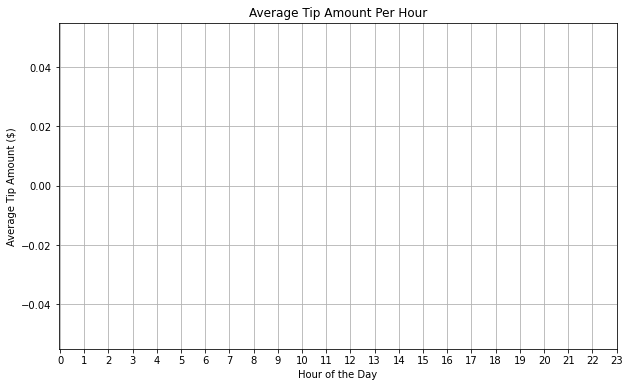

In [0]:
# 16. Get average tip amount per hour. Show graph as visualization
# TODO: Write the code to answer the above question
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Extract the hour from the 'pickup_time' column
df_with_hour = df.withColumn("hour", F.hour(F.col("pickup_time")))

# Calculate the average tip amount per hour
avg_tip_per_hour = df_with_hour.groupBy("hour").agg(
    F.avg("tip_amount").alias("average_tip")
).orderBy("hour")

# Convert to Pandas for easy plotting
avg_tip_per_hour_pd = avg_tip_per_hour.toPandas()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x="hour", y="average_tip", data=avg_tip_per_hour_pd)
plt.title('Average Tip Amount Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



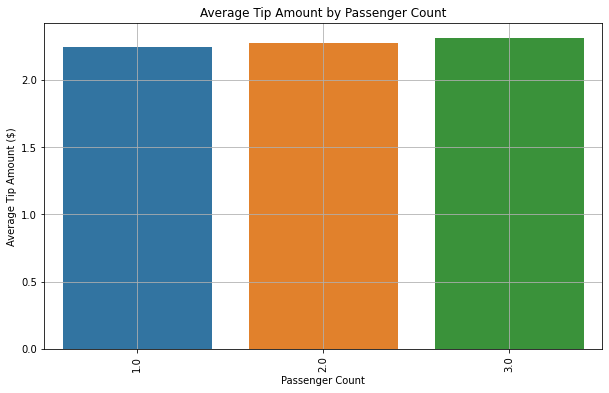

In [0]:
# 17. Get average tip by passenger count and display as bar chart
# TODO: Write the code to answer the above question
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Calculate the average tip by passenger count
avg_tip_by_passenger_count = df.groupBy("passenger_count").agg(
    F.avg("tip_amount").alias("average_tip")
).orderBy("passenger_count")

# Convert to Pandas for easy plotting
avg_tip_by_passenger_count_pd = avg_tip_by_passenger_count.toPandas()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="passenger_count", y="average_tip", data=avg_tip_by_passenger_count_pd)
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


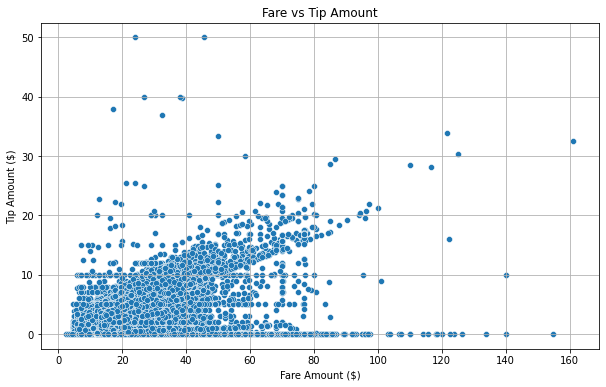

In [0]:
# 18. Get fare vs tip values and display scatter plot style visualization
# TODO: Write the code to answer the above question
import matplotlib.pyplot as plt
import seaborn as sns

# Select fare_amount and tip_amount columns for visualization
fare_vs_tip = df.select("fare_amount", "tip_amount")

# Convert to Pandas DataFrame for plotting
fare_vs_tip_pd = fare_vs_tip.toPandas()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="fare_amount", y="tip_amount", data=fare_vs_tip_pd)
plt.title('Fare vs Tip Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()
